# Stack Overflow Survey Data Mining Project

## Introduction
The purpose of this notebook is to explore/data analysis/data mining from the datasets from Stack Overflow survey result. There are two file, which should be used in pairs, here. They are `survey_result_public.csv` and `survey_result_schema.csv`. Both are from 2019 survey of Stack Overflow users.

## Data Importing
This step we will import the needed libraries and datasets

In [1]:
# Importing needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def import_survey_result(year='2019'):
    """
    Import the needed survey files based.

    Input
    year (string): year you want to take the data in

    Ouput
    result (dataframe): the dataframe contained the result of survey
    schema (dataframe): the dataframe contained the schema of survey
    """
    # File location
    results_public = "data/" + year + "/survey_results_public.csv"
    results_schema = "data/" + year + "/survey_results_schema.csv"

    # File importing
    public = pd.read_csv(results_public)
    schema = pd.read_csv(results_schema)

    return public, schema

In [3]:
# Importing datasets: public and schema

result2019, schema2019 = import_survey_result('2019')

## Exploratory Data Analysis
This step we will explore the data. The 5 question we will answer are:  
1. their most preferred social media,  
2. the age when first code and their current age,  
3. their education,  
4. their work hours, and  
5. their career and current job satisfaction.

It will be helpful if we see the whole columns here. So, we will open all the view limitation on pandas

In [4]:
# Set pandas to show all the columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
result2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

### Answering Question 1:
Their most preferred social media

In [6]:
# Check the distribution of Social Media preference
result2019['SocialMedia'].value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: SocialMedia, dtype: int64

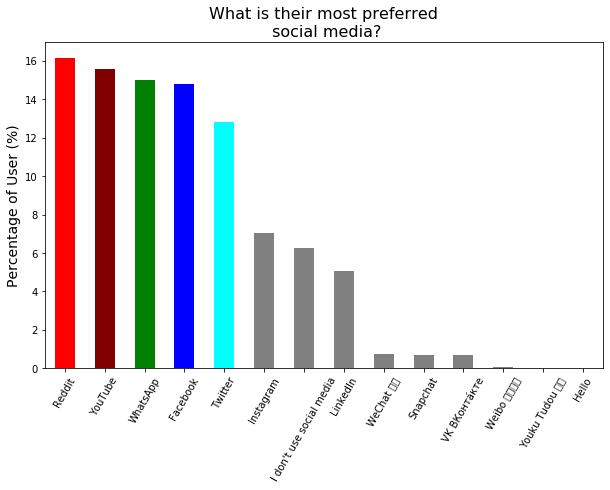

In [7]:
# Plot the social media preferences using bar chart
colors = ['red', 'maroon', 'green', 'blue', 'cyan', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

ax = (result2019['SocialMedia'].value_counts()/result2019.shape[0]*100).plot(kind='bar', figsize=(10, 6), rot=60, color=colors)

ax.set_title('What is their most preferred\n social media?', fontsize=16)
ax.set_ylabel('Percentage of User (%)', fontsize=14);

### Answering Question 2:
Their age when first code and their current age.

In [8]:
# Since the Age1stCode is in object data type, we will turn it into integer

# Check whether it is a digit
age1stCode = result2019[result2019['Age1stCode'].apply(lambda x: str(x).isdigit())]

# Change the data type to int
age1stCode = age1stCode.Age1stCode.values.astype(int)

In [11]:
def draw_boxh(data, title, xlabel):
    """
    Draw a horizontal boxplot with title and xlabel

    Input
    data (pd.DataFrame, pd.Series): the data to plot
    title (string): the title will be plotted
    xlabel (string): the label on x axis

    Output
    None, just a Seaborn plot
    """

    plt.figure(figsize=(10, 5))
    ax = sns.boxplot(data)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16);

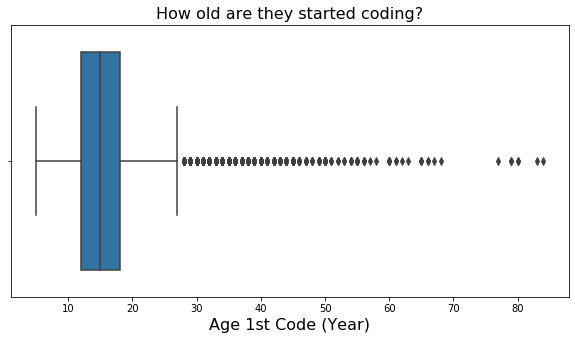

In [13]:
# Boxplot for Age1stCode
title = 'How old are they started coding?'
xlabel = 'Age 1st Code (Year)'
data = age1stCode
draw_boxh(data, title, xlabel)

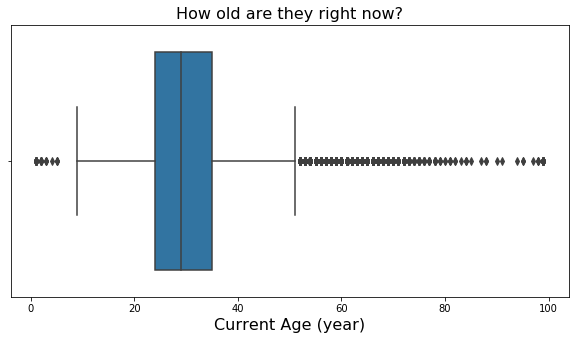

In [14]:
# Plot the user age distribution
data = result2019['Age']
title = 'How old are they right now?'
xlabel = 'Current Age (year)'
draw_boxh(data, title, xlabel)

This 3 sections below is to be neglected since I just exploring the Stack Overflow open source activities.

In [10]:
opensourcer = result2019.OpenSourcer.value_counts()

In [11]:
opensourcer

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

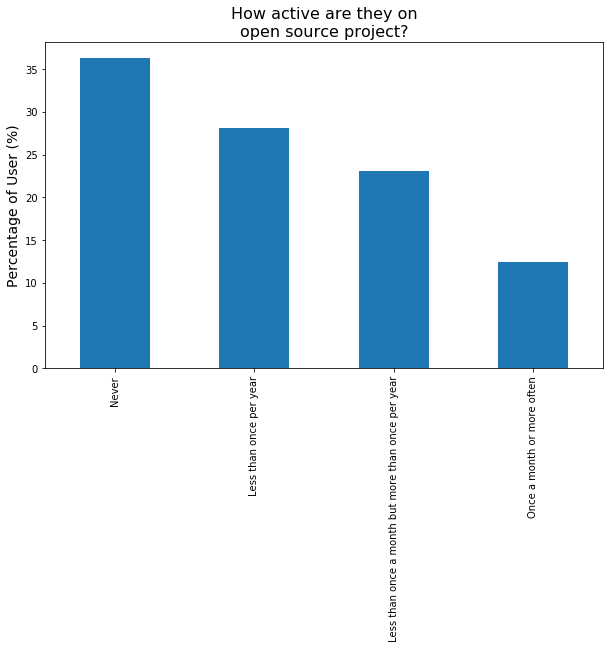

In [55]:
ax = (opensourcer/result2019.shape[0]*100).plot(kind='bar', figsize=(10, 6), rot=90)

ax.set_title('How active are they on\nopen source project?', fontsize=16)
ax.set_ylabel('Percentage of User (%)', fontsize=14);

### Answering Question 3:
Their education

In [15]:
# Check Education Level distribution
ed_val = result2019['EdLevel'].value_counts()
ed_val

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

Since there are some education label that is too long, I will just rename the label into shorter version. The method we use is mapping using .map method.

In [16]:
# Make the map of longer label version to shorter version
edu_keys =  {'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree',
'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
'Some college/university study without earning a degree': "College, didn't graduated",
'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
'Associate degree': 'Associate degree',
'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
'Primary/elementary school': 'Primary school',
'Professional degree (JD, MD, etc.)': 'Professional degree',
'I never completed any formal education': 'No formal education'
            }

In [17]:
# Replace/map the education to shorter version
new_replaced = result2019['EdLevel'].map(edu_keys)

In [24]:
def draw_bar_perc(data, rot, title, xlabel, ylabel, bar_color):
    """
    Draw bar plot in percentage bases

    Input
    data (pd.DataFrame, pd.Series): data to plot
    rot (int): rotation of the xticks
    title (string): title for the chart
    xlabel (string): the label of x axis
    ylabel (string): the label of y axis
    bar_color (list): the color of each bar. Should be the same length as labels
    """
    plt.figure(figsize=(10, 8))
    ax = (data.value_counts()/data.shape[0]*100).plot(kind='bar', rot=rot, color=bar_color)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14);

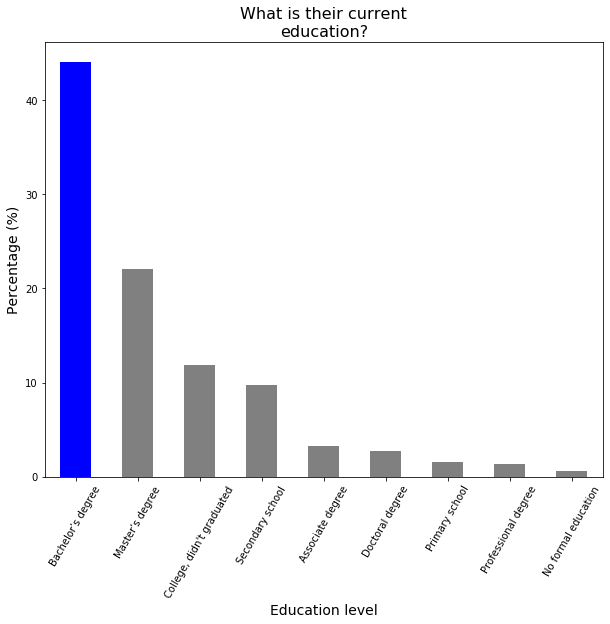

In [26]:
# Give the color wanted to highlight
colors = ['blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

# Give some label
title = 'What is their current\neducation?'
ylabel = "Percentage (%)"
xlabel = "Education level"

# Plot the chart
draw_bar_perc(new_replaced, 60, title, xlabel, ylabel, colors)


### Answering Question 4:
Their work hourse per week

In [28]:
# Get description about the work hours per week
result2019[result2019['WorkWeekHrs']<=100]['WorkWeekHrs'].describe()

count    63984.000000
mean        40.271398
std          9.761038
min          1.000000
25%         40.000000
50%         40.000000
75%         44.000000
max        100.000000
Name: WorkWeekHrs, dtype: float64

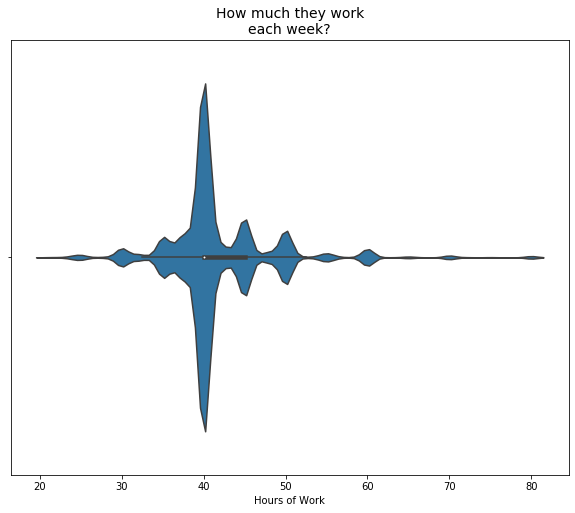

In [29]:
# We want to plot work hours per week based on violin plot of Seaborn's
# Defining the work hours
hours_work = result2019[(result2019['WorkWeekHrs']<=80)&(result2019['WorkWeekHrs']>20)]['WorkWeekHrs']

# Plot the figure
plt.figure(figsize=(10, 8))
ax = sns.violinplot(hours_work)
ax.set_title('How much they work\neach week?', fontsize=14)
ax.set_xlabel('Hours of Work');

This 1 section below is only for some exploration which does not for answering the question.

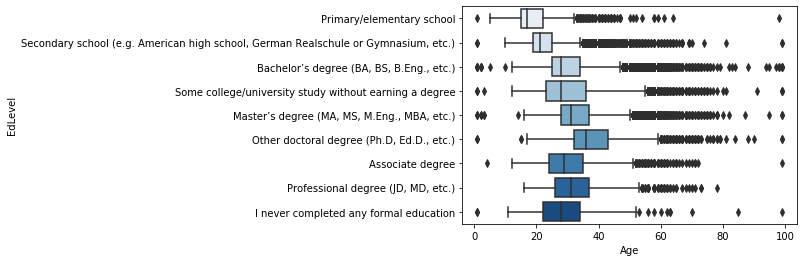

In [47]:
# Use a color palette
ax = sns.boxplot(x=result2019.Age, y = result2019['EdLevel'], palette="Blues")
plt.setp(ax.get_xticklabels(edu_keys.values));

### Answering Question 5:
Their career and current job satisfaction

In [31]:
# Check the career satisfaction distribution
result2019.CareerSat.value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

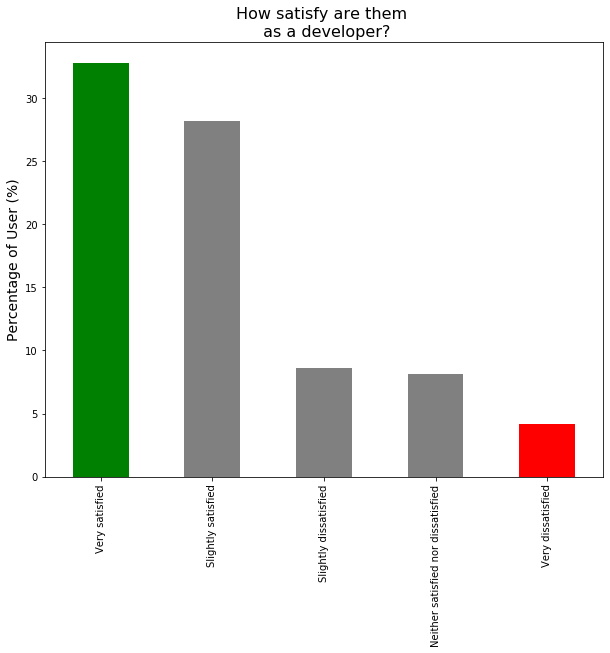

In [32]:
# Plot the career satisfaction using bar chart
colors = ['green', 'grey', 'grey', 'grey', 'red']

# Some information to plot
data = result2019['CareerSat']
title = 'How satisfied are they \n as a developer?'
ylabel = 'Percentage of User (%)'
xlabel = None
draw_bar_perc(data, 90, title, xlabel, ylabel, colors)

In [33]:
# Check the job satisfaction distribution
result2019.JobSat.value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

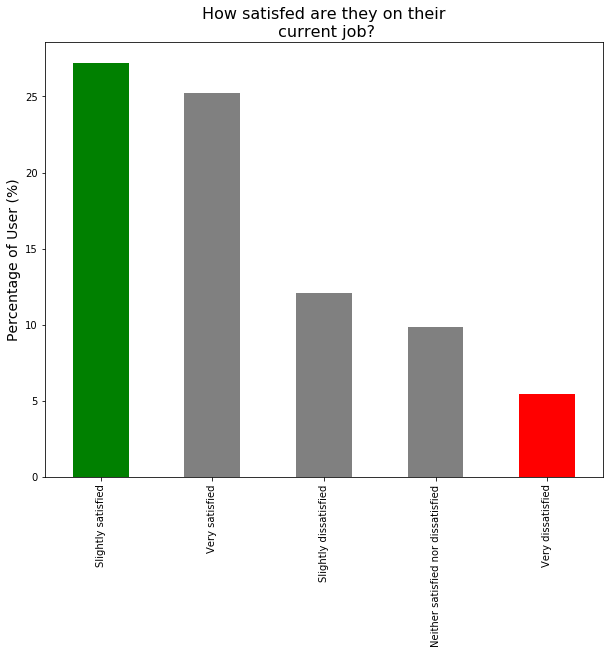

In [34]:
# Plot the job satisfaction using bar chart
colors = ['green', 'grey', 'grey', 'grey', 'red']

# Data to plot
data = result2019['JobSat']

# Additional data to plot
title = 'How satisfed are they on their\n current job?'
ylabel = 'Percentage of User (%)'
xlabel = None
draw_bar_perc(data, 90, title, xlabel, ylabel, colors)

## Conclusion  
Based on our data analysis/data mining above, we finally can answer several question we have previously asked:
1. developers favorite social media is Reddit,
2. they are mainly started programming/coding around early to mid teenage. Developers are mostly in early 20's to late 30's,
3. they are mostly well educated and have Bachelor's degree,
4. they are mostly work for about 40 hours a week, and
5. developers are mostly satisfied with their career and current work.